In [ ]:
pip install cvlib

     |████████████████████████████████| 13.1 MB 26.8 MB/s 
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046385 sha256=4d289d4f3c3e42e80be1863516932b75effbbd4d2cf8d5c7365c59b3b76460b6
  Stored in directory: /root/.cache/pip/wheels/8e/d7/31/bc643bd3a8b11a7368b1ab1d8a6299b33b462ed0b0683ddc5a
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12082 sha256=38ac010afb5077f214243722c5614368e59f523c57d2e57bfca1706ffaeb323a
  Stored in directory: /root/.cache/pip/wheels/f0/fd/1f/3e35ed57e94cd8ced38dd46771f1f0f94f65fec548659ed855
Successfully built cvlib progressbar


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import cvlib as cv
import os
import numpy as np
import tensorflow as tf
from google.colab import files
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
path_dir1 = '/content/drive/MyDrive/cv/project_01/nomask/'
path_dir2 = '/content/drive/MyDrive/cv/project_01/mask/'
 
file_list1 = os.listdir(path_dir1) # path에 존재하는 파일 목록 가져오기
file_list2 = os.listdir(path_dir2)
 
file_list1_num = len(file_list1)
file_list2_num = len(file_list2)
 
file_num = file_list1_num + file_list2_num

#%% 이미지 전처리
num = 0;
all_img = np.float32(np.zeros((file_num, 224, 224, 3))) 
all_label = np.float64(np.zeros((file_num, 1)))
 
for img_name in file_list1:
    img_path = path_dir1+img_name
    img = load_img(img_path, target_size=(224, 224))
    
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    all_img[num, :, :, :] = x
    
    all_label[num] = 0 # nomask
    num = num + 1

for img_name in file_list2:
    img_path = path_dir2+img_name
    img = load_img(img_path, target_size=(224, 224))
    
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    all_img[num, :, :, :] = x
    
    all_label[num] = 1 # mask
    num = num + 1

# 데이터셋 섞기(적절하게 훈련되게 하기 위함) 
np.random.seed(1004)
n_elem = all_label.shape[0]
indices = np.random.choice(n_elem, size=n_elem, replace=False)

all_label = all_label[indices]
all_img = all_img[indices]

# 훈련셋 테스트셋 분할
num_train = int(np.round(all_label.shape[0]*0.8))
num_test = int(np.round(all_label.shape[0]*0.2))

train_img = all_img[0:num_train, :, :, :]
test_img = all_img[num_train:, :, :, :] 

train_label = all_label[0:num_train]
test_label = all_label[num_train:]

219070464/219055592 [==============================] - 1s 0us/step
Number of layers in the base model:  780


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
28/28 [==============================] - 29s 323ms/step - loss: 1168.9583 - accuracy: 0.9205 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
28/28 [==============================] - 3s 126ms/step - loss: 707.7996 - accuracy: 0.9614 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
28/28 [==============================] - 3s 126ms/step - loss: 384.6738 - accuracy: 0.9818 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
28/28 [==============================] - 4s 148ms/step - loss: 495.0724 - accuracy: 0.9705 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
28/28 [==============================] - 3s 126ms/step - loss: 223.0974 - accuracy: 0.9841 - val_loss: 7196.6812 - val_accuracy: 0.8545
Epoch 6/20
28/28 [==============================] - 4s 149ms/step - loss: 1081.0498 - accuracy: 0.9636 - val_loss: 144.8470 - val_accuracy: 0.9909
Epoch 7/20
28/28 [==============================] - 4s 149ms/step - loss: 270.0536 - accuracy: 0.9909 - val_loss

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saved model to disk


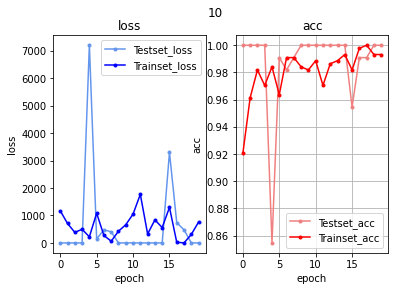

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
28/28 [==============================] - 16s 255ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
28/28 [==============================] - 4s 129ms/step - loss: 91.8418 - accuracy: 0.9977 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
28/28 [==============================] - 4s 151ms/step - loss: 313.6629 - accuracy: 0.9886 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
28/28 [==============================] - 4s 150ms/step - loss: 72.2037 - accuracy: 0.9977 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
28/28 [==============================] - 4s 151ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
28/28 [==============================] - 4s 150ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
28/28 [==============================] - 4s 129ms/step - loss: 126.3970 - accuracy: 0.9955 - val

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saved model to disk


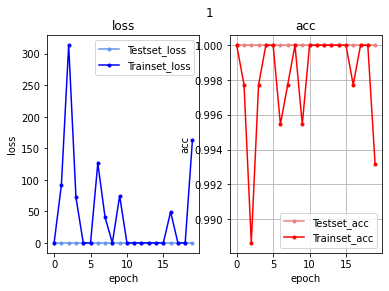

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
28/28 [==============================] - 16s 255ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
28/28 [==============================] - 4s 130ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
28/28 [==============================] - 4s 131ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
28/28 [==============================] - 4s 131ms/step - loss: 26.4815 - accuracy: 0.9977 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
28/28 [==============================] - 4s 152ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
28/28 [==============================] - 4s 131ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
28/28 [==============================] - 4s 153ms/step - loss: 0.0000e+00 - accuracy: 1.000

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saved model to disk


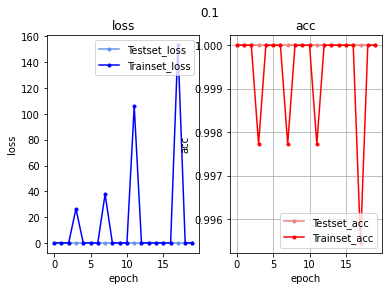

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
28/28 [==============================] - 15s 239ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
28/28 [==============================] - 4s 131ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
28/28 [==============================] - 4s 153ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
28/28 [==============================] - 4s 153ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
28/28 [==============================] - 4s 155ms/step - loss: 12.6552 - accuracy: 0.9977 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
28/28 [==============================] - 4s 132ms/step - loss: 59.4403 - accuracy: 0.9977 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
28/28 [==============================] - 4s 132ms/step - loss: 0.0000e+00 - accuracy: 1.0000 -

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saved model to disk


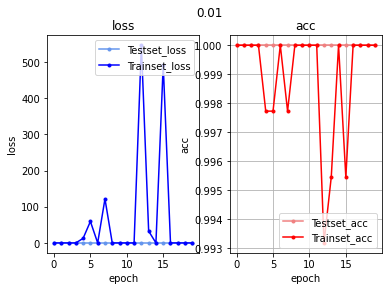

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
28/28 [==============================] - 16s 256ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
28/28 [==============================] - 4s 154ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
28/28 [==============================] - 4s 132ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
28/28 [==============================] - 4s 133ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
28/28 [==============================] - 4s 132ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
28/28 [==============================] - 4s 155ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
28/28 [==============================] - 4s 154ms/step - loss: 0.0000e+00 - accuracy: 1.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saved model to disk


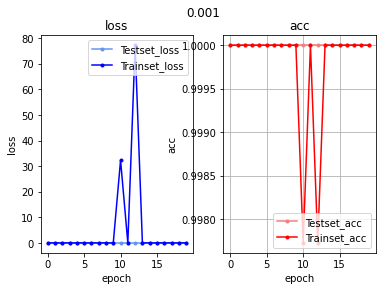

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
28/28 [==============================] - 16s 239ms/step - loss: 73.6293 - accuracy: 0.9955 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
28/28 [==============================] - 4s 132ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
28/28 [==============================] - 4s 132ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
28/28 [==============================] - 4s 154ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
28/28 [==============================] - 4s 133ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
28/28 [==============================] - 4s 133ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
28/28 [==============================] - 4s 133ms/step - loss: 0.0000e+00 - accuracy: 1.000

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saved model to disk


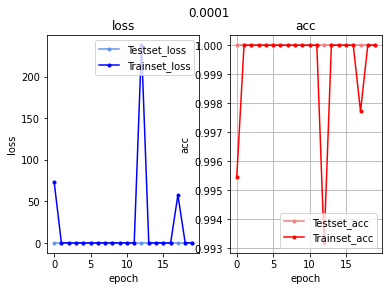

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
28/28 [==============================] - 15s 241ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
28/28 [==============================] - 4s 155ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
28/28 [==============================] - 4s 134ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
28/28 [==============================] - 4s 133ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
28/28 [==============================] - 4s 134ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
28/28 [==============================] - 4s 133ms/step - loss: 195.3275 - accuracy: 0.9955 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
28/28 [==============================] - 4s 134ms/step - loss: 0.0000e+00 - accuracy: 1.00

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saved model to disk


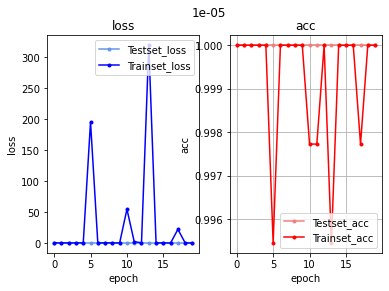

In [ ]:
# create the base pre-trained model
IMG_SHAPE = (224, 224, 3)

base_model = InceptionResNetV2(input_shape=IMG_SHAPE, weights='imagenet', include_top=False)
base_model.trainable = False
#base_model.summary()
print("Number of layers in the base model: ", len(base_model.layers))

flatten_layer = Flatten()
dense_layer1 = Dense(128, activation='relu')
bn_layer1 = BatchNormalization()
dense_layer2 = Dense(1, activation=tf.nn.sigmoid)

model = Sequential([
        base_model,
        flatten_layer,
        dense_layer1,
        bn_layer1,
        dense_layer2,
        ])

#early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=10, verbose=1)

base_learning_rate = [10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

for l in base_learning_rate:
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=l), loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(train_img, train_label, epochs=20, batch_size=16, validation_data = (test_img, test_label))
    model.save("model_colab_lr_{}.h5".format(l))
    files.download("model_colab_lr_{}.h5".format(l))

    print("Saved model to disk")

    #결과를 그래프로 표현하는 부분입니다.

    acc= history.history['accuracy']
    val_acc= history.history['val_accuracy']
    y_vloss = history.history['val_loss']
    y_loss = history.history['loss']

    x_len = np.arange(len(y_loss)) 
    plt.suptitle(l)
    plt.subplot(1, 2, 1)                # nrows=1, ncols=1, index=1
    plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
    plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
    plt.title('loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='upper right')

    plt.subplot(1, 2, 2)                # nrows=1, ncols=2, index=2
    plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
    plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
    plt.title('acc')
    plt.xlabel('epoch')
    plt.ylabel('acc')

    plt.legend(loc='lower right') 
    plt.grid()
    plt.show()